# <font color=blue>Assignments for "Plotting Basic Charts With Matplotlib"</font>

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

1. Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

                 total_cases
location                    
World          1102856997.00
United States   295684836.00
Brazil          131752244.00
India            69707752.00
Russia           58391183.00
Spain            32138729.00
United Kingdom   30967719.00
Italy            30475291.00
Peru             25904950.00
Iran             24052123.00
Germany          23981050.00
Mexico           21687874.00
Chile            21609441.00
Turkey           21432886.00
France           20116466.00
South Africa     18984236.00
Pakistan         17046412.00
Saudi Arabia     16584139.00
China            15499474.00
Bangladesh       12440901.00


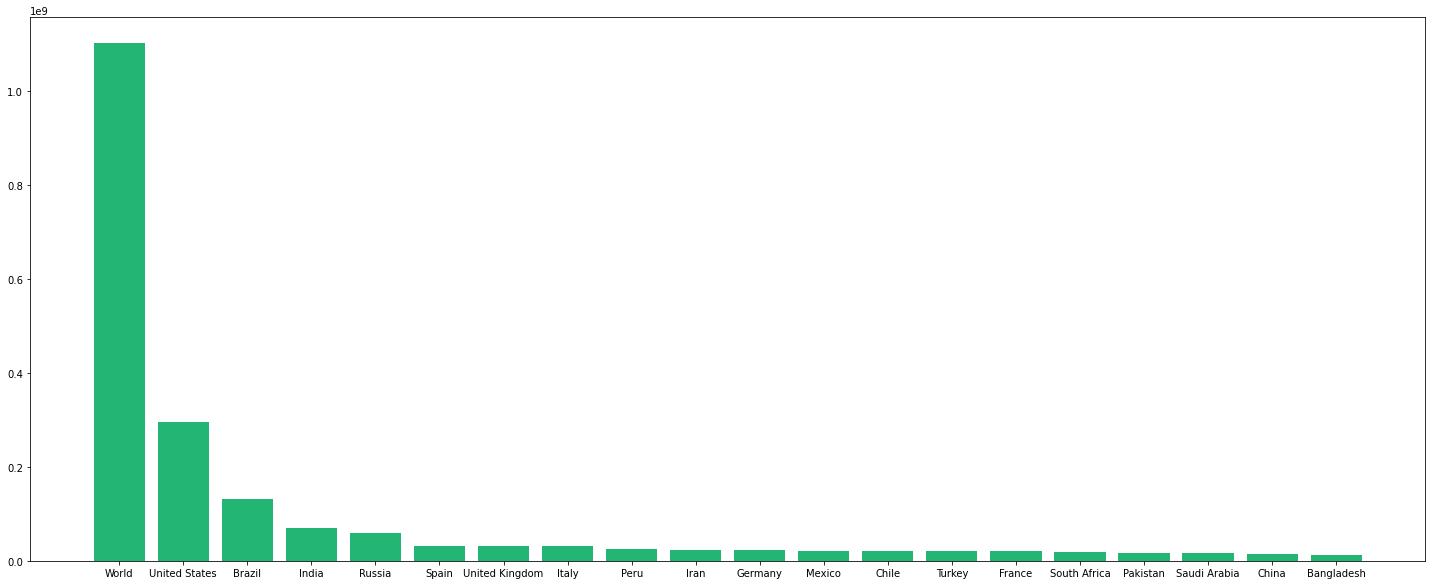

In [95]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('data/owid-covid-data.csv', parse_dates=["date"], low_memory=False)

df=df.groupby("location")['total_cases'].sum().sort_values(ascending=False).head(20)
pd.options.display.float_format = "{:.2f}".format
df=df.to_frame()
h=df.to_numpy(df['total_cases']).flatten().astype(int)
plt.figure(figsize=(25, 10))
print(df)
plt.bar(x =df.index , height = h , color = "#22B573")

plt.show()


2. Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

33001    0.00
33002    0.00
33003    0.00
33004    0.00
33005    0.00
         ... 
33148   15.00
33149   16.00
33150   15.00
33151   14.00
33152   15.00
Name: new_deaths, Length: 152, dtype: float64


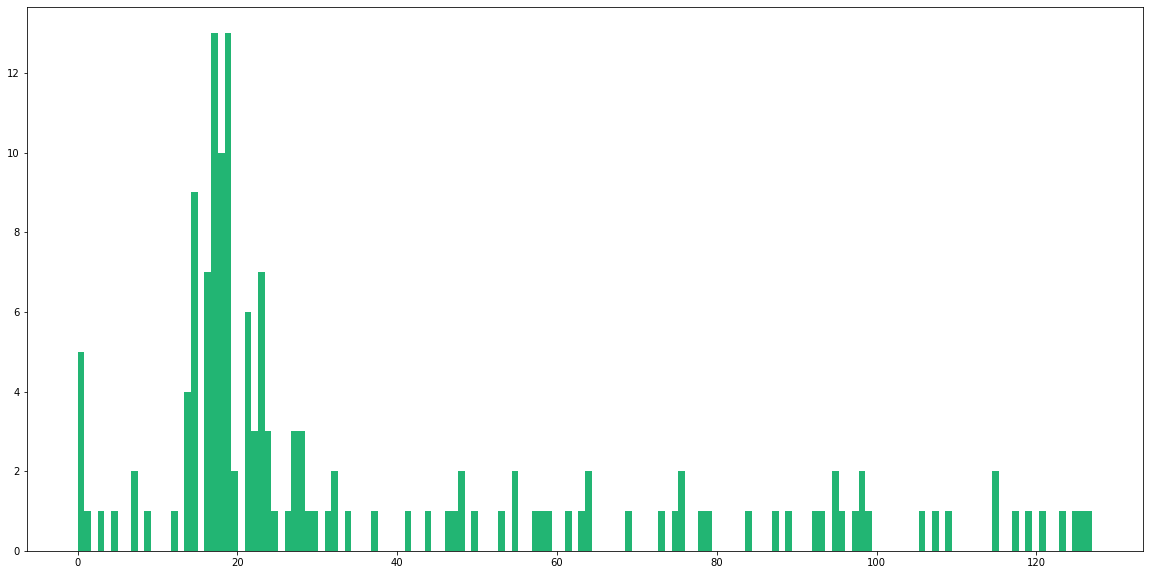

In [104]:
df = pd.read_csv('data/owid-covid-data.csv', parse_dates=["date"], low_memory=False)
tr=df[(df['location']) == 'Turkey']


plt.figure(figsize=(20, 10))
x = tr['new_deaths']
print(x)
plt.hist(x,bins=len(x), color="#22B573") 
plt.show()


3. Plot a scatter plot of new cases and new death for Germany and France.

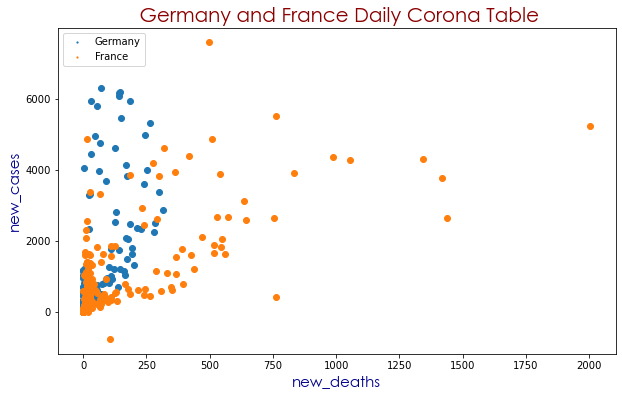

In [105]:

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }

loc = ['Germany','France']
countries = df[df['location'].isin(loc)]

plt.figure(figsize=(10, 6))
plt.title(' Germany and France Daily Corona Table', fontdict = title_style)

for status in loc:
    plt.scatter(df[df.location == status].new_deaths, 
                df[df.location == status].new_cases, label = status)
plt.xlabel('new_deaths',fontdict = axis_style)
plt.ylabel('new_cases', fontdict = axis_style)
plt.legend(loc = 2, markerscale = 0.2)
plt.show()



4. Plot a boxplot for daily deaths for any country you choose.

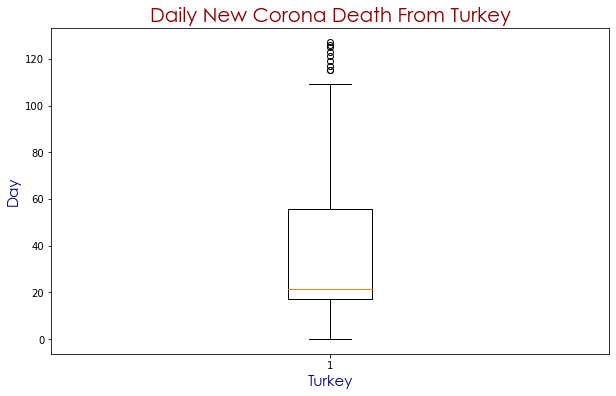

In [106]:

plt.figure(figsize=(10, 6))
plt.title('Daily New Corona Death From Turkey', fontdict = title_style)
plt.boxplot(tr['new_deaths'].dropna())
plt.xlabel('Turkey',fontdict = axis_style)
plt.ylabel('Day', fontdict = axis_style)
plt.show()

5. Calculate the total case for each continent and plot a pie chart 

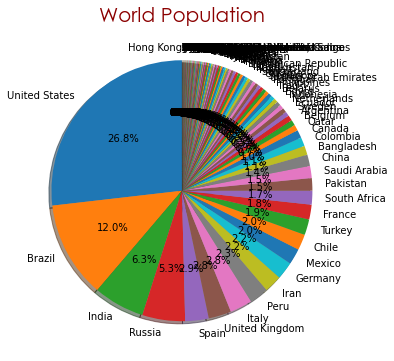

In [130]:
total=df.groupby("location")['total_cases'].sum().sort_values(ascending=False)
total=total[1:]
plt.figure(figsize=(10, 6))
plt.title('World Population', fontdict = title_style)
continents = total.index

tcases=total.to_frame()
h=tcases.to_numpy(tcases['total_cases']).flatten().astype(int)

population = h
plt.pie(population, labels=continents, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()